<a href="https://colab.research.google.com/github/sathwikae46/PRODIGY_ML_01/blob/main/PRODIGY_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Model Coefficients: [  300.71122682 10590.97192105  9417.09449966]
Intercept: -13530.732671776786
Mean Squared Error: 153817333.6322072
R^2 Score: 0.9983784576835049


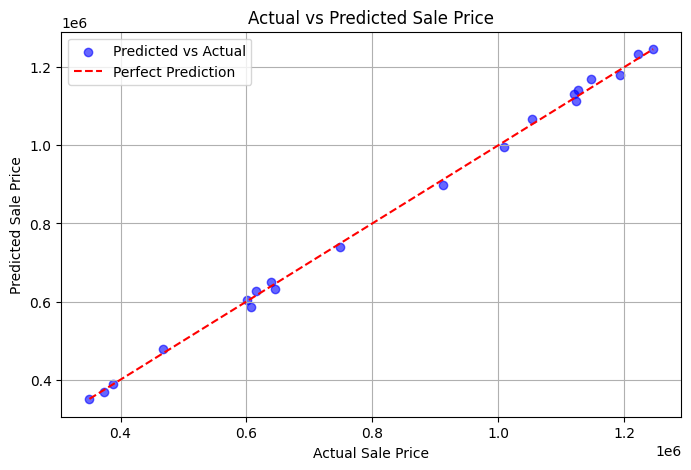

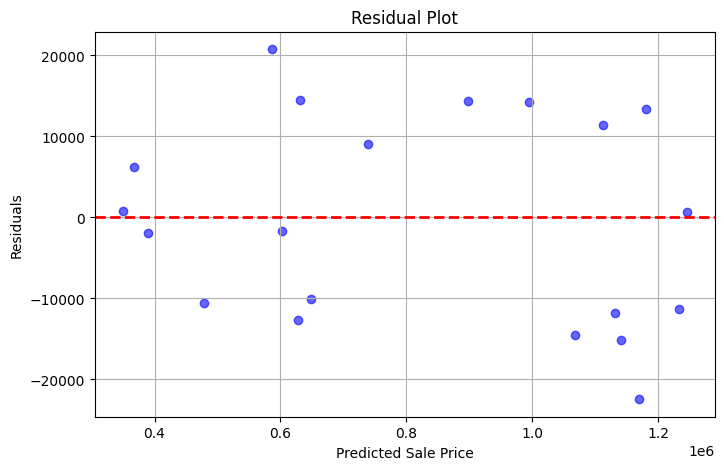

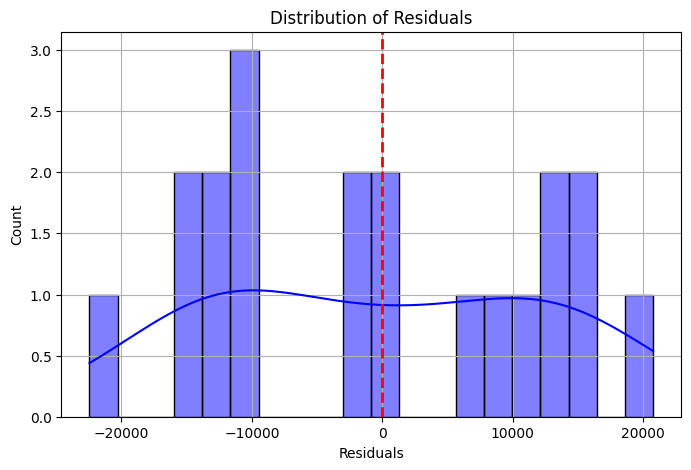


Predicted price for a 2500 sqft, 3-bed, 2-bath house: $788,854.44


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure reproducibility
np.random.seed(42)

# Generate sample dataset
n = 100  # Number of samples
square_feet = np.random.randint(800, 4000, n)
bedrooms = np.random.randint(1, 6, n)
bathrooms = np.random.randint(1, 4, n)
price = (square_feet * 300) + (bedrooms * 10000) + (bathrooms * 5000) + np.random.randint(-20000, 20000, n)

# Create DataFrame
df = pd.DataFrame({'Square_Feet': square_feet, 'Bedrooms': bedrooms, 'Bathrooms': bathrooms, 'Price': price})

# Prepare data
X = df[['Square_Feet', 'Bedrooms', 'Bathrooms']]
y = df['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print model evaluation
print("\nModel Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# ✅ 1. Actual vs Predicted Sale Price (Line Plot)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Perfect Prediction")
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Price")
plt.legend()
plt.grid(True)
plt.show()

# Calculate Residuals
residuals = y_test - y_pred

# ✅ 2. Residual Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Predicted Sale Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

# ✅ 3. Distribution of Residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='blue', bins=20)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(True)
plt.show()

# Predicting price for a new house
new_house = np.array([[2500, 3, 2]])  # Example: 2500 sqft, 3 bedrooms, 2 bathrooms
predicted_price = model.predict(new_house)
print("\nPredicted price for a 2500 sqft, 3-bed, 2-bath house: ${:,.2f}".format(predicted_price[0]))